In [225]:
## 모듈 로딩
from torch import nn
import pandas as pd
import numpy as np
import re               # 정규식 사용
from torch.utils.data import Dataset, DataLoader     # Pytorch Dataset관련 모듈

from konlpy.tag import Okt
from collections import Counter

In [226]:
# 데이터 준비
CSV='pregnant.csv'
FILE_PATH='../NLP_miniproject/'

# 파일 불러와서 읽기
with open(FILE_PATH+CSV, mode='r', encoding='utf-8') as f:
    texts=f.read().splitlines()

In [227]:
texts

['가스봉소[직]염. ',
 '',
 '기종괴전. 가스플레그몬이라고도 한다. \xa0근육 ',
 '',
 "괴사와 독소로 인한 전신증상을 가져오는 중증 질환이다. \xa0Welch's ",
 '',
 'bacillus, Clostridium welchii, C. septicum, C. novyi, C. sporogenes, C. sordelli ',
 '',
 '등의 혐기성균이 근막하에서 증식하여 근 단백질을 분해해서 괴사에 이르게 하고, ',
 '',
 '당을 분해하여 가스를 발생시킨다. \xa0깊고 더러운 창상에서 일어난다.괴저란 ',
 '',
 '\xa0일부 조직의 죽음을 의미하는 \xa0것으로, 혈액 공급의 두절에 의해 생긴다. ',
 '',
 '탈저라고도 한다. 괴저의 부분은 보통 타서 그을린 것처럼 검고, 전체적으로 건조하며 ',
 '',
 '생활반응이 없다. 거의 같은 의미로 괴사(necrosis)라는 용어를 사용하기도 한다. ',
 '',
 '괴저는 신체 각 부위의 돌출된 부분, 이를테면 사지, 특히 손가락 · 발가락 ',
 '',
 '이나 복강내의 담낭(gall bladder)·충수(vermiform appendix)등에서 관찰되며, ',
 '',
 '하지의 가스괴저(gasgangrene), 손가락발가락의 특발성 괴저(탈저), 괴저성 담낭염, ',
 '',
 '괴저성충수염 등으로 불린다. 괴저의 ',
 '',
 '원인이 되는 혈행장애는 혈관의 동맥경화성 병변, 당뇨병성 병변, 폐색성 혈전 혈관염, ',
 '',
 '균 감염, 혈전형성, 국소적 과민반응, 맥각중독(ergot poisoning) 등에 의해 일어난다.어느 ',
 '',
 '부위에 괴저가 형성되면 잡균(saprophytic bacteria)이 침범하게 되는데 이런 경우를 ',
 '',
 "습성 괴저(moist gangrene)라 부르고, 때로는 웰치균(Welch's bacillus ; Clostridium ",
 '',
 'perfringrens)과 같이 가스를 형성하는 잡균의 침입이

In [228]:
texts = ''.join(texts).split('.')

In [229]:
texts

['가스봉소[직]염',
 ' 기종괴전',
 ' 가스플레그몬이라고도 한다',
 ' \xa0근육 괴사와 독소로 인한 전신증상을 가져오는 중증 질환이다',
 " \xa0Welch's bacillus, Clostridium welchii, C",
 ' septicum, C',
 ' novyi, C',
 ' sporogenes, C',
 ' sordelli 등의 혐기성균이 근막하에서 증식하여 근 단백질을 분해해서 괴사에 이르게 하고, 당을 분해하여 가스를 발생시킨다',
 ' \xa0깊고 더러운 창상에서 일어난다',
 '괴저란 \xa0일부 조직의 죽음을 의미하는 \xa0것으로, 혈액 공급의 두절에 의해 생긴다',
 ' 탈저라고도 한다',
 ' 괴저의 부분은 보통 타서 그을린 것처럼 검고, 전체적으로 건조하며 생활반응이 없다',
 ' 거의 같은 의미로 괴사(necrosis)라는 용어를 사용하기도 한다',
 ' 괴저는 신체 각 부위의 돌출된 부분, 이를테면 사지, 특히 손가락 · 발가락 이나 복강내의 담낭(gall bladder)·충수(vermiform appendix)등에서 관찰되며, 하지의 가스괴저(gasgangrene), 손가락발가락의 특발성 괴저(탈저), 괴저성 담낭염, 괴저성충수염 등으로 불린다',
 ' 괴저의 원인이 되는 혈행장애는 혈관의 동맥경화성 병변, 당뇨병성 병변, 폐색성 혈전 혈관염, 균 감염, 혈전형성, 국소적 과민반응, 맥각중독(ergot poisoning) 등에 의해 일어난다',
 "어느 부위에 괴저가 형성되면 잡균(saprophytic bacteria)이 침범하게 되는데 이런 경우를 습성 괴저(moist gangrene)라 부르고, 때로는 웰치균(Welch's bacillus ; Clostridium perfringrens)과 같이 가스를 형성하는 잡균의 침입이 있는 괴저를 가스 괴저라고 부른다",
 '국소는 동통이 심하고 부어올라 괴사하게 된 근은 검붉게 되며, 가스를 함유하므로\xa0압박하면 염발음(crepitation)이 난다',
 '상처의 

In [230]:
texts_list = []
for text in texts:
    text = re.sub(r'[^ㄱ-ㅎ가-힣 ]+', '', text)
    text = text.replace('\xa0','')
    texts_list.append(text)

pd.Series(texts_list).to_csv('infection.csv',encoding='utf-8',index=False)

In [231]:
pd.read_csv('infection.csv')

,0
0,가스봉소직염
1,기종괴전
2,가스플레그몬이라고도 한다
3,근육 괴사와 독소로 인한 전신증상을 가져오는 중증 질환이다
4,등의 혐기성균이 근막하에서 증식하여 근 단백질을 분해해서 괴사에 이르게 하고 당...
...,...
823,알러지에는 계 항생제를 일간 투여한다
824,일이면 증세는 스러지는 것같이 보이나 반드시 일 내지 주일은 치료를 계속하지 않으...
825,균이 완전히 음성이 되었는지 아닌지는 항생물질요법을 종료하고 일 지난 다음 회 목...
826,합병증화농성인 경부림프절염 부비동염 중이염 기관지폐렴 관절염 급성 사구체신염류마티스...


In [232]:
FILE_NAME1 = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\Torch_NLP\NLP_miniproject\data\infection.csv'
FILE_NAME2 = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\Torch_NLP\NLP_miniproject\data\CSVGeniPreg(cleaning).csv'
FILE_NAME3 = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\Torch_NLP\NLP_miniproject\data\sentenced_txt.csv'
FILE_NAME4 = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\Torch_NLP\NLP_miniproject\data\text_data.csv'

In [233]:
df1 = pd.read_csv(FILE_NAME1,names = ['data'])
df1['label'] = 1
df2 = pd.read_csv(FILE_NAME2,names = ['data'])
df2['label'] = 0
df3 = pd.read_csv(FILE_NAME3,names = ['data'])
df3['label'] = 0
df4 = pd.read_csv(FILE_NAME4,names = ['data'])
df4['label'] = 0


In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    814 non-null    object
 1   label   829 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.1+ KB


In [235]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    562 non-null    object
 1   label   562 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [236]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, nan to 993.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    994 non-null    object
 1   label   995 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


In [237]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    1109 non-null   object
 1   label   1110 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


In [238]:
infectionDF = df1

In [239]:
# 데이터가 불균형하기 때문에 균형 맞춰주기
non_infectionDF = pd.concat([df2[50:320],df3[50:320]],ignore_index=True)
non_infectionDF = pd.concat([non_infectionDF,df4[50:320]],ignore_index=True)
non_infectionDF

,data,label
0,월경을 하던 여성에서 개월이 넘도록 월경이 정지하는 것을 속발성 무월경이라고 한다,0
1,임신 성교를 한 여성의 경우 수유를 하는 경우 경구용 피임약 사용을 계속하지 ...,0
2,번이상 월경을 했던 여성이 개월이 넘도록 월경이 없는 경우를 말한다,0
3,약물요법 호르몬 대체 치료 과 투여 한다,0
4,일반요법 일상생활에서 스트레스를 받지 않도록 한다,0
...,...,...
806,이러한 신경성 조절 외에도 체액성 조절에 의해 기립시에는 혈중의 레닌 알도스테론...,0
807,이중 레닌은 특히 앙기오텐신 를 매개하여 세동맥의 수축에 의한 혈압유지에 중요한...,0
808,한편 뇌혈관은 기립시 확장되며 혈관저항이 감소되고 뇌혈류는 증가된다,0
809,이러한 각종 반사적 조절기전에 의한 정상인에 있어서는 기립시 혈압저하 및 뇌혈류...,0


In [240]:
# 결측치 제거하기
infectionDF=infectionDF.dropna()
non_infectionDF=non_infectionDF.dropna()

In [241]:
infectionDF.info() # 814개
non_infectionDF.info() # 812개

<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 0 to 827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    814 non-null    object
 1   label   814 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    811 non-null    object
 1   label   811 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [242]:
# 데이터 합치기
dataDF = pd.concat([infectionDF,non_infectionDF])

In [243]:
dataDF

,data,label
0,0,1
1,가스봉소직염,1
2,기종괴전,1
3,가스플레그몬이라고도 한다,1
4,근육 괴사와 독소로 인한 전신증상을 가져오는 중증 질환이다,1
...,...,...
806,이러한 신경성 조절 외에도 체액성 조절에 의해 기립시에는 혈중의 레닌 알도스테론...,0
807,이중 레닌은 특히 앙기오텐신 를 매개하여 세동맥의 수축에 의한 혈압유지에 중요한...,0
808,한편 뇌혈관은 기립시 확장되며 혈관저항이 감소되고 뇌혈류는 증가된다,0
809,이러한 각종 반사적 조절기전에 의한 정상인에 있어서는 기립시 혈압저하 및 뇌혈류...,0


#### 데이터 토큰화 및 단어 사전 구축 <hr>

In [244]:
### 단어 사전을 생성시에 활용
def build_vocab(corpus, n_vocab, special_tokens):
    counter = Counter()
    for tokens in corpus:
        counter.update(tokens)
    vocab = special_tokens
    for token, count in counter.most_common(n_vocab):
        vocab.append(token)
    return vocab


#### 토큰화

In [245]:
# 명사만 추출
from konlpy.tag import Okt

okt = Okt()

dataDF['token'] = dataDF.apply(lambda row: okt.nouns(row['data']), axis=1)

#### 불용어 list <hr>

In [246]:
korea_stopword = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\Torch_NLP\data\stopwords.txt'

with open(korea_stopword, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 리스트 형태로 저장하기
lines = [line.strip() for line in lines]

In [247]:
lines

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',
 '더구나',
 

* 불용어 & 구두점 제거

In [248]:
## 불용어 추출
from nltk.corpus import stopwords
import string

eng_stopwords = stopwords.words('english') # 리스트 형태
pun = list(string.punctuation) # 구두점 => 문자열 형태임 => 리스트로 형변환
stopwords = lines + pun
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',
 '더구나',
 

In [249]:
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

In [250]:
dataDF['token'] = dataDF['token'].apply(lambda tokens: remove_stopwords(tokens))

In [251]:
## train과 test 데이터셋 나누기
train = dataDF.sample(frac=0.8, random_state=7)
test = dataDF.drop(train.index)

print("Traing Data Size : ", len(train))
print("Test Data Size : ", len(test))

Traing Data Size :  1300
Test Data Size :  70


In [252]:
# 토큰화
tokenizer = Okt()
train_tokens = [[token for token in tokenizer.morphs(review) if token not in stopwords ] for review in train.data]   # 형태소 단위로 나눠서 리스트에 저장
test_tokens = [[token for token in tokenizer.morphs(review) if token not in stopwords] for review in test.data]

# 토큰화 된걸 사전으로 만듬
vocab = build_vocab(corpus = train_tokens,n_vocab=4100,special_tokens=["<pad>","<unk>"])

# 맵핑 부분분
token_to_id = {token : idx for idx, token in enumerate(vocab)}
id_to_token = {idx : token for idx, token in enumerate(vocab)}

print(len(vocab))

4052


In [253]:
token_to_id

{'<pad>': 0,
 '<unk>': 1,
 '경우': 2,
 '적': 3,
 '수': 4,
 '감염': 5,
 '증상': 6,
 '사용': 7,
 '질환': 8,
 '요법': 9,
 '치료': 10,
 '약물': 11,
 '발생': 12,
 '균': 13,
 '또는': 14,
 '원인': 15,
 '증': 16,
 '투여': 17,
 '환자': 18,
 '통증': 19,
 '되는': 20,
 '부위': 21,
 '신': 22,
 '염증': 23,
 '염': 24,
 '내': 25,
 '피부': 26,
 '급성': 27,
 '감소': 28,
 '일반': 29,
 '세균': 30,
 '시': 31,
 '증가': 32,
 '혈관': 33,
 '하며': 34,
 '심장': 35,
 '상태': 36,
 '상': 37,
 '심한': 38,
 '장애': 39,
 '바이러스': 40,
 '열': 41,
 '약': 42,
 '가장': 43,
 '소': 44,
 '발열': 45,
 '혈액': 46,
 '진단': 47,
 '개월': 48,
 '섭취': 49,
 '전': 50,
 '혈': 51,
 '기능': 52,
 '사람': 53,
 '병': 54,
 '호르몬': 55,
 '결석': 56,
 '하기': 57,
 '반응': 58,
 '간': 59,
 '형': 60,
 '항생제': 61,
 '동반': 62,
 '회': 63,
 '일간': 64,
 '효과': 65,
 '요도': 66,
 '주': 67,
 '경': 68,
 '일어나는': 69,
 '예방': 70,
 '지속': 71,
 '전염': 72,
 '있으며': 73,
 '형성': 74,
 '되며': 75,
 '통': 76,
 '수술': 77,
 '운동': 78,
 '구토': 79,
 '생긴다': 80,
 '피': 81,
 '하면': 82,
 '말': 83,
 '정맥': 84,
 '세': 85,
 '조직': 86,
 '합병증': 87,
 '위': 88,
 '독소': 89,
 '검사': 90,
 '저하': 91,
 '류': 92

In [254]:
import pickle
# vocab을 'vocab.pkl' 파일로 저장
with open('vocab.pkl', 'wb') as f:
    pickle.dump(token_to_id, f)

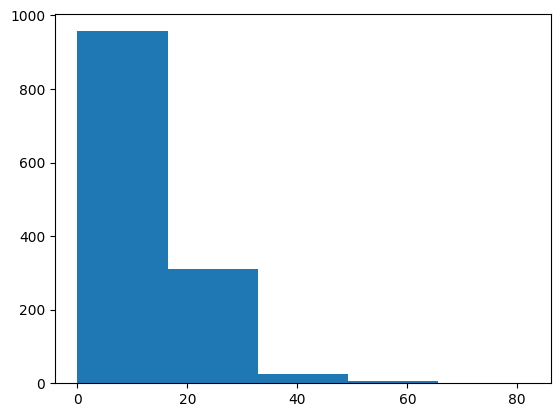

In [255]:
## 패딩을 위한 문장길이 히스토그램
import matplotlib.pyplot as plt

# for tokens in train_tokens:
#     print(len(tokens))
#     break
datalen = [len(tokens) for tokens in train_tokens]
plt.hist(datalen, bins=5)
plt.show()

In [256]:
vocab

['<pad>',
 '<unk>',
 '경우',
 '적',
 '수',
 '감염',
 '증상',
 '사용',
 '질환',
 '요법',
 '치료',
 '약물',
 '발생',
 '균',
 '또는',
 '원인',
 '증',
 '투여',
 '환자',
 '통증',
 '되는',
 '부위',
 '신',
 '염증',
 '염',
 '내',
 '피부',
 '급성',
 '감소',
 '일반',
 '세균',
 '시',
 '증가',
 '혈관',
 '하며',
 '심장',
 '상태',
 '상',
 '심한',
 '장애',
 '바이러스',
 '열',
 '약',
 '가장',
 '소',
 '발열',
 '혈액',
 '진단',
 '개월',
 '섭취',
 '전',
 '혈',
 '기능',
 '사람',
 '병',
 '호르몬',
 '결석',
 '하기',
 '반응',
 '간',
 '형',
 '항생제',
 '동반',
 '회',
 '일간',
 '효과',
 '요도',
 '주',
 '경',
 '일어나는',
 '예방',
 '지속',
 '전염',
 '있으며',
 '형성',
 '되며',
 '통',
 '수술',
 '운동',
 '구토',
 '생긴다',
 '피',
 '하면',
 '말',
 '정맥',
 '세',
 '조직',
 '합병증',
 '위',
 '독소',
 '검사',
 '저하',
 '류',
 '수도',
 '접촉',
 '되면',
 '전신',
 '발진',
 '병변',
 '발',
 '이며',
 '시작',
 '근',
 '에도',
 '속',
 '법',
 '하지',
 '보통',
 '진행',
 '곤란',
 '경련',
 '월경',
 '분비',
 '서',
 '증후군',
 '되지',
 '통해',
 '식품',
 '해',
 '저혈압',
 '술',
 '신장',
 '호흡',
 '유발',
 '자극',
 '나타나는',
 '부종',
 '제한',
 '확장',
 '동',
 '이라고',
 '만',
 '중',
 '하는데',
 '발병',
 '있으므로',
 '많은',
 '없다',
 '장염',
 '많이',
 '항',
 '기립',
 '뇌졸중',
 '주사',
 '물',

In [257]:
# 못걸러진 불용어 찾기
all_tokens = [token for tokens in train_tokens for token in tokens]
token_counts = Counter(all_tokens)
frequencies = list(token_counts.values())

token_counts.most_common(100)

[('경우', 243),
 ('적', 229),
 ('수', 168),
 ('감염', 160),
 ('증상', 153),
 ('사용', 120),
 ('질환', 116),
 ('요법', 114),
 ('치료', 92),
 ('약물', 91),
 ('발생', 79),
 ('균', 79),
 ('또는', 77),
 ('원인', 77),
 ('증', 76),
 ('투여', 72),
 ('환자', 69),
 ('통증', 62),
 ('되는', 60),
 ('부위', 55),
 ('신', 55),
 ('염증', 54),
 ('염', 52),
 ('내', 50),
 ('피부', 49),
 ('급성', 48),
 ('감소', 46),
 ('일반', 46),
 ('세균', 45),
 ('시', 43),
 ('증가', 40),
 ('혈관', 39),
 ('하며', 39),
 ('심장', 39),
 ('상태', 39),
 ('상', 38),
 ('심한', 37),
 ('장애', 37),
 ('바이러스', 36),
 ('열', 36),
 ('약', 36),
 ('가장', 36),
 ('소', 36),
 ('발열', 36),
 ('혈액', 35),
 ('진단', 35),
 ('개월', 33),
 ('섭취', 33),
 ('전', 32),
 ('혈', 32),
 ('기능', 32),
 ('사람', 32),
 ('병', 31),
 ('호르몬', 31),
 ('결석', 31),
 ('하기', 31),
 ('반응', 30),
 ('간', 30),
 ('형', 30),
 ('항생제', 30),
 ('동반', 29),
 ('회', 29),
 ('일간', 29),
 ('효과', 29),
 ('요도', 29),
 ('주', 28),
 ('경', 28),
 ('일어나는', 28),
 ('예방', 28),
 ('지속', 28),
 ('전염', 28),
 ('있으며', 27),
 ('형성', 27),
 ('되며', 27),
 ('통', 27),
 ('수술', 27),
 ('운동', 26),
 ('구토

In [258]:
## 정수 인코딩 및 패딩
import numpy as np
# 패딩까지 해주는 함수
def pad_sequences(sequences, max_length, pad_value):  #입력받는 sequences는 리스트형태
    result = list()
    for sequence in sequences:
        sequence = sequence[:max_length] # 시퀀스가 max_lenth보다 길경우 뒷부분을 자른다
        pad_length = max_length - len(sequence)
        padded_sequence = sequence + [pad_value] * pad_length   # 시퀀스가 짧을경우 남은부분을 0으로 채움
        result.append(padded_sequence)
    return np.asarray(result)

In [259]:
unk_id = token_to_id["<unk>"]   # 단어사전에 없는 단어를 처리할때
train_ids = [[token_to_id.get(token, unk_id) for token in review] for review in train_tokens]  # 각 토큰에 대응하는 정수 ID반환, 존재하지않으면 unk
test_ids = [[token_to_id.get(token, unk_id) for token in review] for review in test_tokens]

train_data_length = [len(data) for data in train_ids]
test_data_length = [len(data) for data in test_ids]

# fig = plt.figure(figsize = (15, 15))
# axes = fig.subplots(1, 2)
# axes[0].hist(train_data_length)
# axes[1].hist(test_data_length)

# plt.show()

max_length = 21
pad_id = token_to_id["<pad>"]
train_ids = pad_sequences(train_ids, max_length, pad_id)
test_ids = pad_sequences(test_ids, max_length, pad_id)

print(train_ids[0])
print(test_ids[0])

[40  5 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[1459  384  571   79    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


### 모델 준비

In [260]:
## 데이터로더
import torch
from torch.utils.data import TensorDataset
from torchmetrics.classification import BinaryF1Score

train_ids = torch.tensor(train_ids)
test_ids = torch.tensor(test_ids)

train_labels = torch.tensor(train.label.values, dtype=torch.long)
test_labels = torch.tensor(test.label.values, dtype=torch.long)

train_dataset = TensorDataset(train_ids, train_labels)
test_dataset = TensorDataset(test_ids, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [261]:
for feature, label in train_loader:
    print(feature)
    print(label)
    break

tensor([[ 290,   30,    5,  227,  678,  216,   61,   14, 1588, 1535,    7,  242,
            0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1384, 1385,  115,  229,  698, 1386,  826,    5,    4,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0],
        [ 354, 3487,  739,  100,  134,  389,   95,  177, 3488,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0],
        [  55,   10,   68,   55,    7,  226,   38,    2, 1507,   64,   17,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0],
        [2006,  108,   82, 1021,   50, 2007,  189,  347,  221, 2008, 2009,  118,
         1022,  306,   24,  675, 2010,  329, 2011,    0,    0],
        [ 426,   15,  426,   40, 2310,  558,   11,  151,  399, 1505,  879,   73,
          521,   40,  426,  130,   82,  221, 1130,   23,   83],
        [2811,  115,  318,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0

In [262]:
from torch import nn

class SentenceClassifier(nn.Module):
    def __init__(
        self,
        n_vocab,
        hidden_dim,
        embedding_dim,
        n_layers,
        dropout = 0.5,
        bidirectional = True,
        model_type = 'lstm'):

        super().__init__()

        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=embedding_dim,
            padding_idx=0
        )
        if model_type == 'rnn':
            self.model = nn.RNN(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout,
            batch_first=True,
        )
        elif model_type == 'lstm':
            self.model = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout,
            batch_first=True,
            )
        
        if bidirectional:
            self.classifier = nn.Linear(hidden_dim * 2,1)
        else:
            self.classifier = nn.Linear(hidden_dim,1)
        self.dropout = nn.Dropout(dropout)

    def forward(self,inputs):
        embeddings = self.embedding(inputs)
        output,_ = self.model(embeddings)
        last_output = output[:,-1,:]
        last_output = self.dropout(last_output)
        logits = self.classifier(last_output)
        return logits

In [263]:
from torch import optim

n_vocab  = len(token_to_id)
hidden_dim = 64
embedding_dim = 128
n_layers = 5

device = 'cuda' if torch.cuda.is_available() else 'cpu'
classifier = SentenceClassifier(
    n_vocab=n_vocab,hidden_dim=hidden_dim,embedding_dim=embedding_dim,n_layers=n_layers
).to(device)
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = optim.RMSprop(classifier.parameters(),lr=0.001)


### 모델 학습 및 테스트 <hr>

- >>> 모델 저장 관련 준비

In [264]:
### models 폴더 아래 프로젝트 폴더 아래 모델 파일 저장
import os

# 저장 경로
SAVE_PATH = '../NLP_miniproject/model/'
# 저장 파일명
SAVE_FILE = SAVE_PATH+'model_train_wbs.pth'
# 모델 구조 및 파라미터 모두 저장 파일명
SAVE_MODEL=SAVE_PATH+'model_all.pth'

In [265]:
# 경로상 폴더 존재 여부 체크
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH) # 폴더/폴더/... 하위 폴더 까지 생성

In [266]:
from torchmetrics.classification import BinaryF1Score

In [267]:
def train(model, datasets, criterion, optimizer, device, interval):
    model.train()
    losses = list()
    scores = list()
    

    for step,(input_ids,labels) in enumerate(datasets):
        input_ids = input_ids.to(device)
        labels = labels.to(device).unsqueeze(1).float()
        
        logits = model(input_ids)
        loss = criterion(logits, labels)
        losses.append(loss.item())
        train_score= BinaryF1Score()(logits, labels)
        scores.append(train_score)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % interval ==0:
            print(f'Train Loss {step} : {np.mean(losses)}, Train Score : {np.mean(scores)}')
    # print(f'')

def test(model,datasets,criterion,device):
    model.eval()
    losses = list()
    corrects = list()

    for step, (input_ids, labels) in enumerate(datasets):
        input_ids = input_ids.to(device)
        labels = labels.to(device).unsqueeze(1).float()

        logits = model(input_ids)
        loss = criterion(logits, labels)
        losses.append(loss.item())
        yhat = torch.sigmoid(logits)>.5
        val_score= BinaryF1Score()(yhat, labels)
        corrects.append(val_score.item())
        # corrects.extend(
        #                     torch.eq(yhat, labels).cpu().tolist()
        # )
    print(f'Val Loss : {np.mean(losses)}, Val Accuracy : {np.mean(corrects)}')
    val_loss = np.mean(losses)
    val_accuracy = np.mean(corrects)
    return val_loss, val_accuracy
    


In [268]:
import torch.optim.lr_scheduler as lr_scheduler
epochs = 45
interval = 500
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'max', patience = 100, verbose = True)
LOSE_HISTORY = list()
ACCURACY_HISTORY = list()
for epoch in range(epochs):
    print(f'*************** {epoch}epoch ***************')
    train(classifier,train_loader,criterion,optimizer,device,interval)
    val_loss, val_accuracy = test(classifier,test_loader,criterion,device)
    
    scheduler.step(val_loss)

    LOSE_HISTORY.append(val_loss)
    ACCURACY_HISTORY.append(val_accuracy)

    if len(LOSE_HISTORY) == 1:
    # 첫 번째라서 무조건 모델 파라미터 저장
        # torch.save(classifier.state_dict(), SAVE_FILE)
    # 모델 전체 저장
        torch.save(classifier, SAVE_MODEL)
    else:
        if LOSE_HISTORY[-1] < min(LOSE_HISTORY[:-1]):
            # torch.save(classifier.state_dict(), SAVE_FILE)
            torch.save(classifier, SAVE_MODEL)
            print(f'----------------------{LOSE_HISTORY[-1]} : {SAVE_MODEL}---------------------------')

*************** 0epoch ***************
Train Loss 0 : 0.689082145690918, Train Score : 0.0


c:\Users\KDP-14\anaconda3\envs\TEXT_018_230_38\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Val Loss : 0.6995459794998169, Val Accuracy : 0.46315789222717285
*************** 1epoch ***************
Train Loss 0 : 0.6701611280441284, Train Score : 0.75
Val Loss : 0.6381312847137451, Val Accuracy : 0.4106666803359985
----------------------0.6381312847137451 : ../NLP_miniproject/model/model_all.pth---------------------------
*************** 2epoch ***************
Train Loss 0 : 0.6011964082717896, Train Score : 0.7142857313156128
Val Loss : 0.5464462697505951, Val Accuracy : 0.45784616470336914
----------------------0.5464462697505951 : ../NLP_miniproject/model/model_all.pth---------------------------
*************** 3epoch ***************
Train Loss 0 : 0.5203403234481812, Train Score : 0.6153846383094788
Val Loss : 0.4809841990470886, Val Accuracy : 0.51370187997818
----------------------0.4809841990470886 : ../NLP_miniproject/model/model_all.pth---------------------------
*************** 4epoch ***************
Train Loss 0 : 0.20469088852405548, Train Score : 0.933333337306976